In [1]:
from keras.preprocessing.image import ImageDataGenerator
from testing import load_image
import experiments as exp
import numpy as np
from skimage import io

import matplotlib.pyplot as plt

def show_classification_result(img_path, label):
    img = io.imread(img_path)
    
    fig = plt.figure(figsize=(3, 3))
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    plt.title(label)
    plt.imshow(np.asarray(img))
    plt.yticks([], [])
    plt.xticks([], [])
    plt.show()

with open('datasets/ntcir/categories.txt') as f:
    labels = f.readlines()

Using TensorFlow backend.


In [2]:
#from PIL import Image

#s = Image.open('work.jpg')
#new_image = s.resize((224, 224))
#s.save('work2.jpg')
#print(image.size)
#print(new_image.size)

datagen = ImageDataGenerator(rescale=1. / 255)
print (datagen)
# model = exp.resNet50(weights='./weights.resNet50.lr_0.001.phase_2.fold_10.epoch_02.tf.hdf5')                           # Shapes (100352, 21) and (2048, 21) are incompatible 1.14 2.3.1
# model = exp.vgg16_second_phase_model(weights='./weights.vgg-16.phase_2.fold_10.epoch_09.tf.hdf5')                      # Very bad predictions
model = exp.inceptionV3_first_phase_model(weights='./weights.inceptionV3.lr_4e-05.phase_2.fold_10.epoch_09.tf.hdf5')
# model = exp.vgg16_second_phase_model(weights='weights.vgg-16.RF.layers_fc1.fold_10.pkl')                               # Incompatible
# model = exp.probabilities_plus_lstm()                                                                                  # Shape problem
print('here')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2021-12-24 13:28:56.491153: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-12-24 13:28:56.554624: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla V100-SXM2-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.53
pciBusID: 0000:0a:00.0
2021-12-24 13:28:56.554909: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2021-12-24 13:28:56.556658: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-12-24 13:28:56.558141: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2021-12-24 13:28:56.558465: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2021-12-24 13:28:56.560491: I tensorflow/stream_executor/platfo

2021-12-24 13:28:57.031774: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x559e299a7070 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2021-12-24 13:28:57.031809: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2021-12-24 13:28:57.031943: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2021-12-24 13:28:57.031953: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      



here


<class 'numpy.float32'>
0.3857487


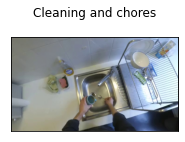

Cleaning and chores



In [17]:
import cv2
import numpy

image = './frames/frames/'+'frame1.jpg'

# img = load_image(datagen, image, (224,224))
img = load_image(datagen, image, (299,299))

# print (img.shape)
# img = numpy.reshape(img, (img.shape[1], img.shape[2], img.shape[3]))
# print (img.shape)

predictions = model.predict(img)
category = np.argmax(predictions)
print(predictions[(0,category)])

show_classification_result(image, labels[category])

print(labels[category])
name = labels[category]

In [ ]:
import os
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array

img = numpy.reshape(img, (img.shape[1], img.shape[2], img.shape[3]))
img_array = img_to_array(img)

draw = ImageDraw.Draw(img_array)
# font = ImageFont.truetype(<font-file>, <font-size>)
font = ImageFont.truetype("sans-serif.ttf", 16)
# draw.text((x, y),"Sample Text",(r,g,b))
draw.text((0, 0),"Sample Text",(255,255,255),font=font)
img_array.save('sample-out.jpg')

# font = cv2.FONT_HERSHEY_DUPLEX
#cv2.putText(img_array, name, (15, 15), font, 0.5, (255, 255, 255), 1)
#img = numpy.reshape(img, (img.shape[1], img.shape[2], img.shape[3]))
# r = save_img('tmp2.jpg', img_array)
#r = cv2.imwrite('tmp.jpg', img_array)
#print(r)
# cv2.imshow('ImageWindow', img_array)

In [ ]:
import cv2
import numpy

input_movie = cv2.VideoCapture("frames/YDXJ0105.mkv")
length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))

fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_movie = cv2.VideoWriter('frames/out24122021.avi', fourcc, 29.97, (640, 360))

frame_number = 0

def rescale_frame(frame, percent=75):
    scale_percent = 75
    width = 299
    height = 299
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation =cv2.INTER_AREA)
    
#while True:
    # Grab a single frame of video
    # ret, frame = input_movie.read()
    # frame_number += 1

    # Quit when the input video file ends
    # if not ret:
        # break
        
for x in range(length):
    ret, frame = input_movie.read()
    
    frame_number += 1
    
    img = rescale_frame(frame)
    
    img = numpy.reshape(img, (1, img.shape[0], img.shape[1], img.shape[2]))
    # img = change_res(299, 299) # load_image(datagen, frame, (299,299))
    #print(type(img))

    predictions = model.predict(img)
    category = np.argmax(predictions)
    #print(predictions[(0,category)])

    #show_classification_result(img, labels[category])
    name = labels[category]
    print(labels[category])

    # Draw a box around the face
    # cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

    # Draw a label with a name below the face
    # cv2.rectangle(frame, (left, bottom - 25), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(frame, name, (50, 50), font, 0.5, (255, 255, 255), 1)

    # Write the resulting image to the output video file
    print("Writing frame {} / {}".format(frame_number, length))
    output_movie.write(frame)

In [ ]:
import cv2
vidcap = cv2.VideoCapture("frames/YDXJ0105.mkv")
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frames/frames/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1